https://benalexkeen.com/linear-programming-with-python-and-pulp/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pulp
import pandas as pd

## part 1  (setup/visualization)

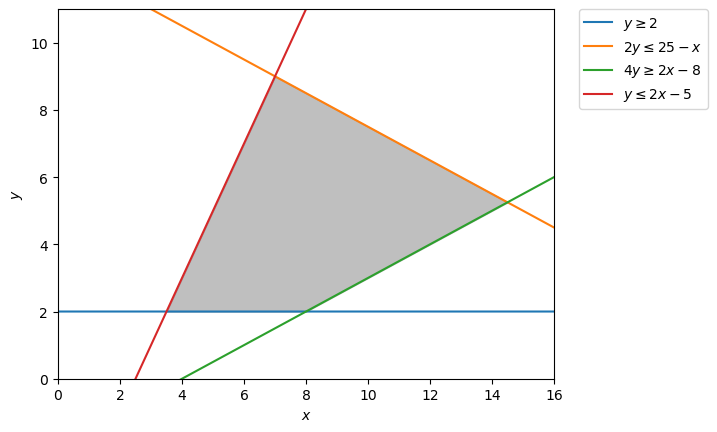

In [3]:
# original plot from tutorial

# Construct lines
# x > 0
x = np.linspace(0, 20, 2000)
# y >= 2
y1 = (x*0) + 2
# 2y <= 25 - x
y2 = (25-x)/2.0
# 4y >= 2x - 8 
y3 = (2*x-8)/4.0
# y <= 2x - 5 
y4 = 2 * x -5

# Make plot
plt.plot(x, y1, label=r'$y\geq2$')
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
# Fill feasible region
y5 = np.minimum(y2, y4)     #y5 is a vector of y values from orange/red lines, just top edge of shaded region
y6 = np.maximum(y1, y3)     #y6 is a vector from blue/green
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

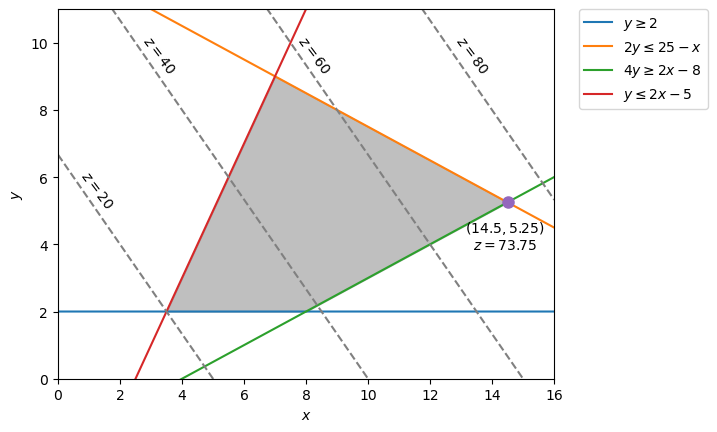

In [47]:
# Construct lines
# x > 0
x = np.linspace(0, 20, 2000)
# y >= 2
y1 = (x*0) + 2
# 2y <= 25 - x
y2 = (25-x)/2.0
# 4y >= 2x - 8 
y3 = (2*x-8)/4.0
# y <= 2x - 5 
y4 = 2 * x -5

c1 = 20
c2 = 40
c3 = 60
c4 = 80
# c5 = 100

yc1 = (c1 - 4*x)/3
yc2 = (c2 - 4*x)/3
yc3 = (c3 - 4*x)/3
yc4 = (c4 - 4*x)/3
# yc5 = (c5 - 4*x)/3

xo = [14.5]
yo = [5.25]

# Make plot
plt.plot(x, y1, label=r'$y\geq2$')
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')

plt.plot(x, yc1, linestyle='dashed', color='gray')
plt.plot(x, yc2, linestyle='dashed', color='gray')
plt.plot(x, yc3, linestyle='dashed', color='gray')
plt.plot(x, yc4, linestyle='dashed', color='gray')

plt.annotate('$z=20$',(1.25,5), rotation=-53,ha='center',va='bottom' )
plt.annotate('$z=40$',(3.25,9), rotation=-53,ha='center',va='bottom' )
plt.annotate('$z=60$',(8.25,9), rotation=-53,ha='center',va='bottom' )
plt.annotate('$z=80$',(13.333,9), rotation=-53,ha='center',va='bottom' )


#https://www.tutorialspoint.com/how-can-i-plot-a-single-point-in-matplotlib-python
plt.plot(xo,yo, marker="o", markersize=8
        #  ,label=r'optimal $z$ value'
         )
#https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
# plt.text(14.5,5.25,'$(14.5,5.25)$',horizontalalignment='right')
# plt.annotate('$(14.5,5.25)$',(14.4,5.25),
#              textcoords="offset points",xytext = (-10,0),
#              ha='right',
#              va='center')
plt.annotate('$(14.5,5.25)$\n$z=73.75$',(14.4,5.25),
             textcoords="offset points",xytext = (0,-12),
             ha='center',
             va='top')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
# Fill feasible region
y5 = np.minimum(y2, y4)     #y5 is a vector of y values from orange/red lines, just top edge of shaded region
y6 = np.maximum(y1, y3)     #y6 is a vector from blue/green
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [3]:
y5

array([-5.        , -4.97998999, -4.95997999, ...,  2.510005  ,
        2.5050025 ,  2.5       ])

In [4]:
y2

array([12.5      , 12.4949975, 12.489995 , ...,  2.510005 ,  2.5050025,
        2.5      ])

In [5]:
y4

array([-5.        , -4.97998999, -4.95997999, ..., 34.95997999,
       34.97998999, 35.        ])

## part 2  (solving with PuLP)

In [6]:
my_lp_problem = pulp.LpProblem("My_LP_Problem", pulp.LpMaximize)


In [7]:
x = pulp.LpVariable('x', lowBound=0, cat='Continuous')
y = pulp.LpVariable('y', lowBound=2, cat='Continuous')

In [8]:
# Objective function
my_lp_problem += 4 * x + 3 * y, "Z"

# Constraints
my_lp_problem += 2 * y <= 25 - x
my_lp_problem += 4 * y >= 2 * x - 8
my_lp_problem += y <= 2 * x - 5

In [9]:
my_lp_problem

My_LP_Problem:
MAXIMIZE
4*x + 3*y + 0
SUBJECT TO
_C1: x + 2 y <= 25

_C2: - 2 x + 4 y >= -8

_C3: - 2 x + y <= -5

VARIABLES
x Continuous
2 <= y Continuous

In [10]:
my_lp_problem.solve()
pulp.LpStatus[my_lp_problem.status]

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/nate/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/e026d7ccfc9346acb7884ed0c44a5c68-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/e026d7ccfc9346acb7884ed0c44a5c68-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 17 RHS
At line 21 BOUNDS
At line 23 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
0  Obj 6 Primal inf 3.4999999 (1) Dual inf 6.9999998 (2)
0  Obj 6 Primal inf 3.4999999 (1) Dual inf 1e+10 (1)
2  Obj 73.75
Optimal - objective value 73.75
Optimal objective 73.75 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



'Optimal'

In [11]:
for variable in my_lp_problem.variables():
    print("{} = {}".format(variable.name, variable.varValue))

x = 14.5
y = 5.25


In [12]:
print(pulp.value(my_lp_problem.objective))

73.75
